In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import random
from scipy.sparse import triu,tril

#Conjugate Gradient Algorithm

In [64]:
def ConjugateGradientLinearSystemEquations(matrix, vector, x0,tolerance, max_iterations = 10):
  #Solution obtained by inbuilt solver
  x = np.linalg.solve(matrix,vector)

  #gradient of the function
  gradient = matrix @ x0 - vector

  #norm of the gradient
  norm = np.linalg.norm(gradient)

  #initialising from 0th iteration
  i = 0

  #keep track of ||x* - xK|| obtained after each iteration
  trial_points = [np.linalg.norm(x - x0)]

  #keep track of norms of gradients obtained after each iteration
  norms = [norm]

  #keep track of the Conjugate vectors b0, b1,... etc
  B = []
  while(norm > tolerance and i < max_iterations):
    if i == 0:
      #initialising b0
      b = -gradient
      B.append(b)

      #calculating alpha0
      alpha = (b.T @ b) / (b.T @ matrix @ b)
      x0 += (alpha * b)
      gradient = matrix @ x0 - vector
      norm = np.linalg.norm(gradient)
      trial_points.append(np.linalg.norm(x - x0))
      norms.append(norm)
      i += 1
    else:
      #computing conjugate vector at each iteration
      b = gradient
      for conj in B:
        #caluculation betas: coefficients of previous conjugate vectors to be added
        beta = 0
        denom = conj.T @ matrix @ conj

        #ensuring denominator is not so close to 0 or is zero
        if np.abs(denom) > 1e-9:
          beta = -(conj.T @ matrix @ gradient) / (conj.T @ matrix @ conj)
        b += (beta*conj)

      B.append(b)
      denom = b.T @ matrix @ b
      alpha = 0

      #ensuring denominator is not so close to 0 or is zero
      if np.abs(denom) > 1e-9:
        alpha = -(b.T @ gradient) / (b.T @ matrix @ b)
      x0 += (alpha*b)
      gradient = matrix @ x0 - vector
      norm = np.linalg.norm(gradient)
      trial_points.append(np.linalg.norm(x - x0))
      norms.append(norm)
      i += 1

  return x0, (trial_points, norms)

#Generating Sparse matrix and vector

In [63]:
def generateRandomSparseSymmetricMatrix(size, density):
  #generating the elements of the matrix
  data = np.random.rand(int(size * (size + 1) * density) // 2)
  indices = np.random.choice(size * size, len(data), replace=False)
  row_indices, col_indices = np.unravel_index(indices, (size, size))
  matrix = np.zeros((size, size))

  #Ensuring that matrix is symmetric
  matrix[row_indices, col_indices] = data
  matrix[col_indices, row_indices] = data

  # Ensure the matrix is positive semidefinite
  min_eigval = np.min(np.linalg.eigvalsh(matrix))
  offset = max(-min_eigval + 1e-6, 0)  # Ensure offset is non-negative
  matrix += np.eye(size) * offset

  # Ensure the matrix is positive definite
  matrix += np.eye(size) * size * 1e-6

  return matrix

In [61]:
def generateRandomSparseVector(size, density):
  indices = np.random.choice(size, int(size * density), replace=False)
  vector = np.zeros(size)
  vector[indices] = np.random.rand(len(indices))
  return vector

#Plots

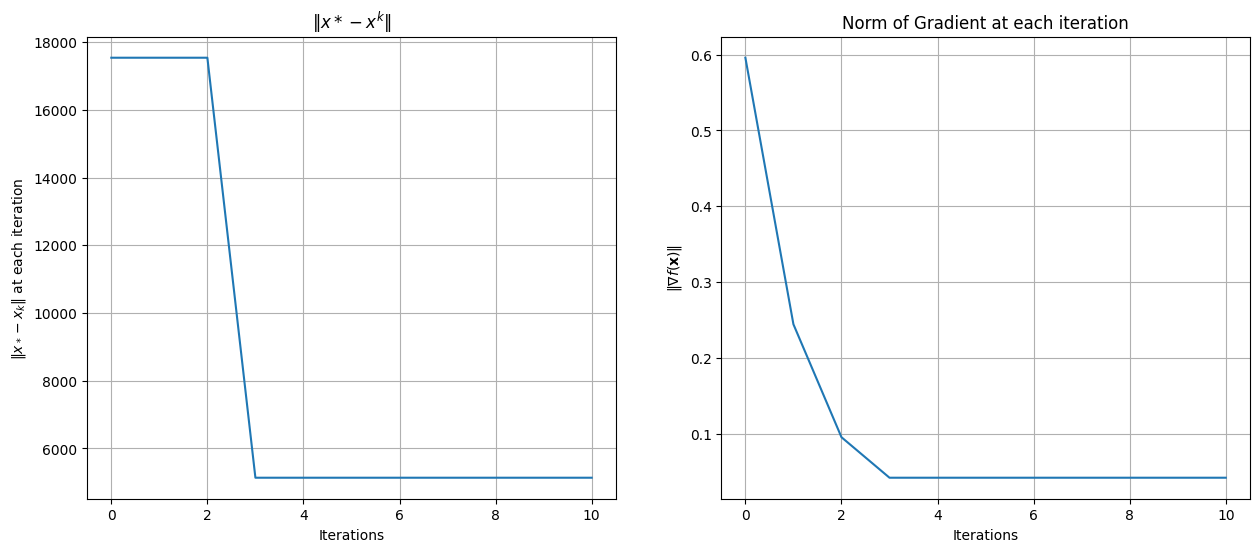

In [73]:
#defining size and density of matrix and vector
size = 3
density = 0.6

#tolerance
tolerance = 0.01

#initial trial point
x0 = np.array([0.0,1.0,0.0])

#generatin The matrix and vector
Q = generateRandomSparseSymmetricMatrix(size, density)
b = generateRandomSparseVector(size, density)

#Solving by calling the function
x, cache = ConjugateGradientLinearSystemEquations(Q,b,x0,tolerance)

#Plots
difference_norm, norms = cache
iterations = np.arange(len(cache[0]))
fig, axes = plt.subplots(1, 2, figsize = (15,6))
axes[0].set_title(r"$\|x* - x^k\|$")
axes[0].plot(iterations, difference_norm)
axes[0].set_xlabel("Iterations")
axes[0].set_ylabel(r"$\|x_* - x_k\|$ at each iteration")
axes[0].grid(True)

axes[1].set_title("Norm of Gradient at each iteration")
axes[1].plot(iterations,norms)
axes[1].set_xlabel("Iterations")
axes[1].set_ylabel(r"$\|\nabla f(\mathbf{x}) \|$")
axes[1].grid(True)